<a href="https://colab.research.google.com/github/Warpedro1/Machine-learning-behind-the-curtain/blob/main/knn-NaiveBayes-DecisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
url = 'https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv'
df = pd.read_csv(url)

In [ ]:
df.describe()

,Maior65Anos,MesesDeContrato,ContaMensal
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Maior65Anos              7043 non-null   int64  
 1   Conjuge                  7043 non-null   object 
 2   Dependentes              7043 non-null   object 
 3   MesesDeContrato          7043 non-null   int64  
 4   TelefoneFixo             7043 non-null   object 
 5   VariasLinhasTelefonicas  7043 non-null   object 
 6   ServicoDeInternet        7043 non-null   object 
 7   SegurancaOnline          7043 non-null   object 
 8   BackupOnline             7043 non-null   object 
 9   SeguroNoDispositivo      7043 non-null   object 
 10  SuporteTecnico           7043 non-null   object 
 11  TVaCabo                  7043 non-null   object 
 12  StreamingDeFilmes        7043 non-null   object 
 13  TipoDeContrato           7043 non-null   object 
 14  PagamentoOnline         

In [ ]:
df.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


#Preparação de Dados I

##Transformando valores categóricos manualmente

In [ ]:
map = {
    'Sim': 1,
    'Nao':0
    }
manual =  df[['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn']].replace(map)

In [ ]:
manual.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


##Transformando valores categores Usando get_dummies

In [ ]:
#get_dummies pega as categorias presentes em cada coluna e transforma em novas colunas usando 1 ou 0
dummie_data = pd.get_dummies(df.drop(columns = ['Conjuge','Dependentes','TelefoneFixo','PagamentoOnline','Churn']))

#Unindo dois dataframes
final_df = pd.concat( [dummie_data, manual], axis =1 )
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Maior65Anos                                   7043 non-null   int64  
 1   MesesDeContrato                               7043 non-null   int64  
 2   ContaMensal                                   7043 non-null   float64
 3   VariasLinhasTelefonicas_Nao                   7043 non-null   uint8  
 4   VariasLinhasTelefonicas_SemServicoTelefonico  7043 non-null   uint8  
 5   VariasLinhasTelefonicas_Sim                   7043 non-null   uint8  
 6   ServicoDeInternet_DSL                         7043 non-null   uint8  
 7   ServicoDeInternet_FibraOptica                 7043 non-null   uint8  
 8   ServicoDeInternet_Nao                         7043 non-null   uint8  
 9   SegurancaOnline_Nao                           7043 non-null   u

In [ ]:
#faz com que o .head() mostre a quantidade de colunas escolhidas
pd.set_option('display.max_columns',39)

##Dados desabalanceados


**Quando uma categoria possui mais valores uq e a outra**

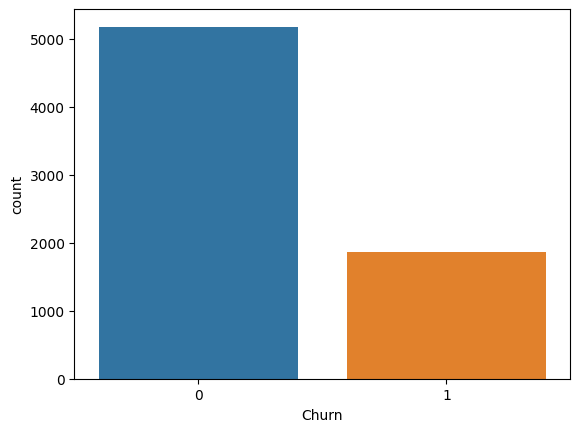

In [ ]:
import seaborn as sns
ax = sns.countplot(x='Churn', data=final_df)

Um método que pode ser usado é o **oversampling**, que cria novas instâncias para a categoria com menos. Uma Técnica é o **SMOTE** e feita pegando duas instâncias próximas ja existentes e pegando os **dados intermediários**, não sendo necessariamente a média.

In [ ]:
x = final_df.drop(['Churn'],axis=1)
y = final_df['Churn']

from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=5)
x, y = smt.fit_resample(x,y)

final_df = pd.concat([x,y], axis=1)

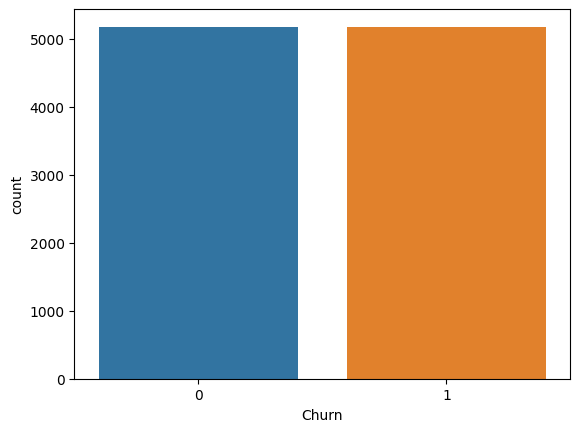

In [ ]:
ax = sns.countplot(x = 'Churn', data = final_df)

#kNN por trás do panos

In [ ]:

Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [ ]:
X = final_df.drop('Churn', axis = 1)
y = final_df['Churn']

In [ ]:
from sklearn.preprocessing import StandardScaler

norm = StandardScaler()
X_norm = norm.fit_transform(x)

#standardScaler.transform so aceita como parâmetro de entrada array de duas dimensões, por isso o pd.dataframe, transformando o Xmaria em um dataframe
#um dataframe são dados organizados em uma estrutura bidimensional
xmaria_norm = norm.transform(pd.DataFrame(Xmaria, columns = x.columns))

#(Xmaria, columns = x.columns) --> ai transformar o vetor da Xmaria em um conjunto de linhas colunas contendo as mesmas colunas do nosso conjunto x

In [ ]:
pd.DataFrame(Xmaria, columns = x.columns)

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline
0,0,0,1,1,0,0,39.9,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1


In [ ]:
xmaria_norm

array([[-0.40868545, -1.15137432, -2.29940252,  1.12398491, -0.3190435 ,
        -0.83217125, 85.39097662,  0.97499366, -0.44819859, -1.13684809,
        -0.44819859,  1.90579383, -0.95058171,  2.23115382, -0.63611502,
        -0.95704832, -0.44819859, -0.64046351,  0.88187382,  2.23115382,
         1.89390587, -0.8343353 , -0.44819859,  1.27870653, -0.83100748,
         2.23115382, -0.78509228, -0.44695427, -1.33846016, -0.42148404,
         2.33567894, -0.77068917, -0.47363024,  2.2828238 , -0.78992399,
        -0.53025348, -3.00290276,  0.81860231]])

##Distância Euclidiana

In [ ]:
import numpy as np

a = xmaria_norm

b = X_norm

In [ ]:
#quando se faz uma operação com duas instâncias de um dataframe, todas as features dessas são alteradas pela operação de forma ordenada
a-b

array([[ 0.        , -0.04150397, -0.99616184, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        , -1.41113514, -1.93189791, ...,  0.        ,
        -3.33591387,  2.04019671],
       [ 0.        , -0.08300795, -1.82485799, ...,  0.        ,
        -3.33591387,  0.        ],
       ...,
       [-2.85555505, -2.03369476, -3.10037665, ...,  0.        ,
        -3.33591387,  2.04019671],
       [ 0.        , -0.12451192, -2.69106515, ...,  0.        ,
        -3.33591387,  2.04019671],
       [ 0.        , -0.70556757, -2.75742585, ...,  0.        ,
        -3.33591387,  2.04019671]])

In [ ]:
np.sqrt(np.sum(np.square(a-b)))

#Implementando Modelo knn

In [ ]:
from sklearn.model_selection import  train_test_split

SEED = 123

x_train, x_test, y_train, y_test= train_test_split(X_norm, y, random_state=SEED, test_size=0.3 )

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
#manhattan , minkowski , chebyshev --> outra métricas de distância
knn = KNeighborsClassifier(metric= 'euclidean')



In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

accuracy_score(y_test,knn.predict(x_test))

0.8112721417069243

In [ ]:
confusion_matrix(y_test,knn.predict(x_test))

array([[1230,  339],
       [ 247, 1289]])

#distância do exemplo para o resto

In [ ]:
def calcula_distancia(dados_clientes, dados_maria, numero_clientes):
    distancias = []

#loop para percorrer cliente por cliente
    for i in range(numero_clientes):
        dist1 = dados_maria - dados_clientes[i]            #subtração dos atributos
        soma_quadrado = np.sum(np.square(dist1))    #exponenciação e soma de todos os atributos
        distancias.append(np.sqrt(soma_quadrado))   #raiz quadrada da soma anterior

    return distancias

#Naive bayes Bernouli model


In [ ]:
import numpy as np
np.median(x_train)

-0.4481985915711518

In [ ]:
from sklearn.naive_bayes import BernoulliNB
#vai transforma em binário a partir do valor de 0.44
bnb = BernoulliNB(binarize = 0.44 )



bnb.fit(x_train,y_train)

BernoulliNB(binarize=0.44)

In [ ]:
accuracy_score(y_test,bnb.predict(x_test))




0.7578099838969404

#Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion = 'entropy', random_state= SEED)

dtc.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=123)

In [ ]:
dtc.feature_importances_

array([0.01231443, 0.16771507, 0.22973259, 0.0101721 , 0.0033813 ,
       0.0116499 , 0.00060713, 0.02504051, 0.        , 0.01656304,
       0.        , 0.01553491, 0.00610711, 0.        , 0.00821932,
       0.01067592, 0.00043522, 0.00838202, 0.01403334, 0.        ,
       0.01767918, 0.00738091, 0.00027777, 0.00734466, 0.00366511,
       0.00092243, 0.00404312, 0.0416655 , 0.14996678, 0.08326924,
       0.01577121, 0.01836651, 0.02055659, 0.02289949, 0.02428843,
       0.0146941 , 0.00712703, 0.01951802])

In [ ]:
accuracy_score(y_test,dtc.predict(x_test))


0.8041867954911434


#Validação de Modelo

[[1230  339]
 [ 247 1289]]


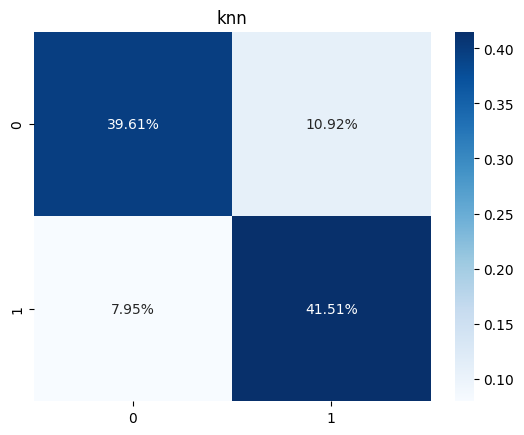

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

cf_matrix = confusion_matrix(y_test,knn.predict(x_test))

print(cf_matrix)

import seaborn as sns

ax = plt.axes()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues',ax=ax)

ax.set_title('---knn---')
plt.show()

[[1073  496]
 [ 256 1280]]


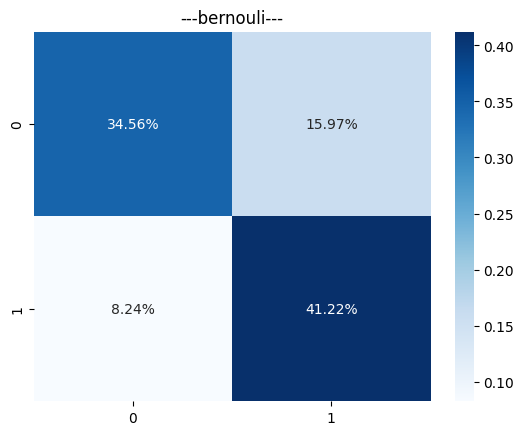

In [ ]:
cf_matrix = confusion_matrix(y_test,bnb.predict(x_test))

print(cf_matrix)

import seaborn as sns

ax = plt.axes()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues',ax=ax)

ax.set_title('---bernouli---')
plt.show()

[[1260  309]
 [ 299 1237]]


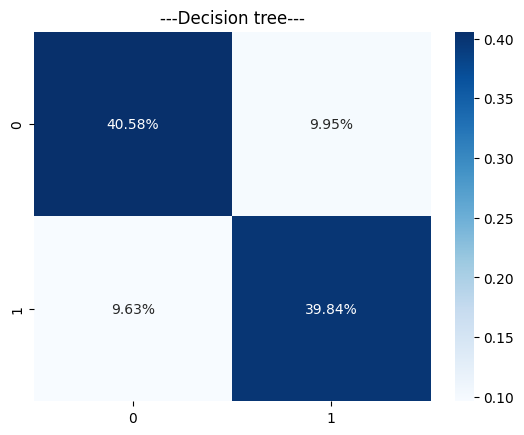

In [ ]:
cf_matrix = confusion_matrix(y_test,dtc.predict(x_test))

print(cf_matrix)

import seaborn as sns

ax = plt.axes()
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Blues',ax=ax)

ax.set_title('---Decision tree---')
plt.show()